In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import scipy as sp
import json
import os
import math

import matplotlib
from matplotlib import pyplot as plt
plt.style.use('ggplot')

#from mpl_toolkits.basemap import Basemap, cm
from matplotlib.path import Path

from datetime import datetime
from dateutil import tz
import time
import datetime
import calendar


from stravalib.client import Client
from stravalib import unithelper

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


In [3]:
m_to_yd = 1.09361
m_to_miles = 1609.34

catalina_yd = 35323.71

json_data=open('{0}/strava_credentials.json'.format(os.getenv("HOME"))).read()
credentials = json.loads(json_data)
client = Client(access_token=credentials['AccessToken'])

In [4]:
activities = client.get_activities(after='2017-01-01', before='2017-09-05')

my_swims = pd.DataFrame([{'name':activity.name, 
                          'id': activity.id, 
                          'stroke_count': 2 * activity.average_cadence if activity.average_cadence is not None else None,
                          'average_speed':float(unithelper.meters_per_second(activity.average_speed)),
                          'elapsed_time':unithelper.timedelta_to_seconds(activity.elapsed_time), 'start_date': activity.start_date,
                          'distance':float(unithelper.meters(activity.distance)) * m_to_yd} for activity in activities if activity.type=='Swim'])
my_swims = my_swims.set_index('start_date')
my_swims.index = pd.DatetimeIndex(my_swims.index)
my_swims.index = my_swims.index.tz_convert('US/Pacific')
my_swims['month'] = my_swims.index.month
my_swims['month_name'] = my_swims['month'].apply(lambda x: calendar.month_abbr[x])
my_swims['ds_week_ending'] = my_swims.index.to_period('W').end_time
my_swims['is_pool'] = ['pool' if "[POOL]" in name else 'open water' for name in my_swims.name]
my_swims['hours']=my_swims.elapsed_time/3600

No handlers could be found for logger "stravalib.model.Activity"


![alt text](../images/CatalinaMan.jpg "Title")

## Overview


In 2016, as I moved more steps in the world of Marathon Swimming, I decided I was ready to tackle some serious Channel Swimming. 

Inspired by my buddy [Zach](https://zachmargolis.com/swims/), my friend Andrew and I decided to go for the Catalina Channel. This covered all the basis: 

* It's Local: easier to get to without having to haul all the "stuff" across an Ocean.
* It's Long: approximately the same distance of the English Channel
* It's Hard: both part of the [Ocean 7](https://en.wikipedia.org/wiki/Ocean%27s_seven) and the [Triple Crown](http://www.triplecrownofopenwaterswimming.com/)

Andrew, far more organized than yours truly, researched and found information about training plans, and off we went. 



## The Plan

Catalina Total: 20.1 mi (32.3 km - 35323.71 yds) 

### Vox Populi

First of all we researched on the more reliable forums:

From the [marathonswimmers blog](http://marathonswimmers.org/forum/discussion/20/weekly-training-volume-for-completing-marathon-swims/p2#Comment_19509)

The two most common rules of thumb are:

1. Weekly training volume should be (at least) equal to your target swim distance, for several months.
2. At least one training swim of 65-75% of your target distance.
3. other people suggest that 40 to 45k per week is required from the start of the relevant calender year.


From the 
[usms forum](http://forums.usms.org/showthread.php?20306-what-does-it-take-to-swim-big-distance/page2&p=262847#post262847)

1. At least 60-75% of the length of the swim before you attempt it. 
2. Train about 35K-50K yards per week for at least 6 months prior to a marathon swim and do at least 3 swims of over 6 hours during that time
3. Train for at least 6-8 months for a swim of over 15 miles, and for a swim over 20 miles, which will usually take in the 7-10+ hour range, a swimmer should have done at least 2 swims of 6 hours or more in the prep up to the swim, but not closer than 3-4 weeks before the "big" swim.

Another detailed [Channel Training Plan](http://swimkatie.com/the-training-plan).


### Our Plan

Our plan ended up being quite simple and flexible: a progression of weekly yards and a crescendo of training benchmarks:	
* 15 Mile Training Swim	
* 4x 50% swims (10 miles) - Plan out of coves	
* 37k week for 3 months prior	

| Month    | Days | Yardage |    Yds/Day   |  Yds/Week |  hrs/Week |
| :------- |:---: | :-----: | :----------: | :-------: | :-------: |
| January  | 31   | 125000  | 4032.258065  |   28225   |    7.6    |
| February | 28   | 130000  | 4642.857143  |   32500   |    9.8    |
| March    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| April    | 31   | 140000  | 4516.129032  |   31615   |   10.6    |
| May      | 31   | 140000  | 4516.129032  |   31615   |    8.5    |
| June     | 30   | 150000  | 5000         |   35000   |   11.4    |
| July     | 31   | 150000  | 4838.709677  |   33870   |    9.1    |
| August   | 31   | 150000  | 4838.709677  |   33870   |   11.4    |

### The Execution

We ended up following the plan quite closely, hitting above the mark for most of the training.

In [5]:
my_swims.groupby(my_swims.index.month)['distance'].sum()/4.0

start_date
1    29405.286423
2    28491.055803
3    37800.793691
4    41600.104193
5    41914.571748
6    37810.198738
7    38048.523697
8    29452.557715
9     3466.935082
Name: distance, dtype: float64

### Milestones

The fun part of the training has been pushing the limits and ramping up to longer and longer swims. This is a path full of false starts and learnings.
I like to believe that failures are even more educational than successes, and I had plenty of failures on my training.

#### Two Hours

The two hours mark was hit and passed quite easily, with a beautiful out of cove swim accompanied by a great crew. The infamous [5 Coves of Death](marathonswimmers.org/blog/2013/05/five-coves-of-death/) is another great chance to squeeze 2 challenging swims in a day and hang with a bunch of crazy swimmers.

#### Four Hours

This milestone was harder to hit. This is when feeding and technique started to matter, with 

* First attempt: locked hips - not feeding frequently enough - too much variety
* Second attempt: hypo and fed not frequently enough
* First 4 hours: Duke's supervision
* Second 4 hours: Coves
* Third 4 hours: Lagoon
* Fourth 4 hours: Tahoe!!! (7/10/17 Tahoe Swim)

#### Six Hours

* First attempt: Duke to the resque - too much water in the guts - locked hip - 4:30
* Second attempt: Cove - locked hip (bad) - 3:00
* First 6 hours: Lagoon
* Third Attempt 6 hours: botched Night Swim
* Second 6 hours: Lagoon


#### Eight Hours

* Lagoon at Night (7/17/17 8 hr night swim)

#### Total Yards

In [6]:
my_swims.distance.sum()

1151960.108355

#### Pool vs. Open Water

In [9]:
my_swims.groupby(['is_pool'])['distance'].agg({'total' : 'sum', 'percentage' : 'mean'})

/Users/luca_pozzi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


percentage          total
is_pool                               
open water  4539.424467  685453.094522
pool        4529.194309  466507.013833

#### Going the Distance

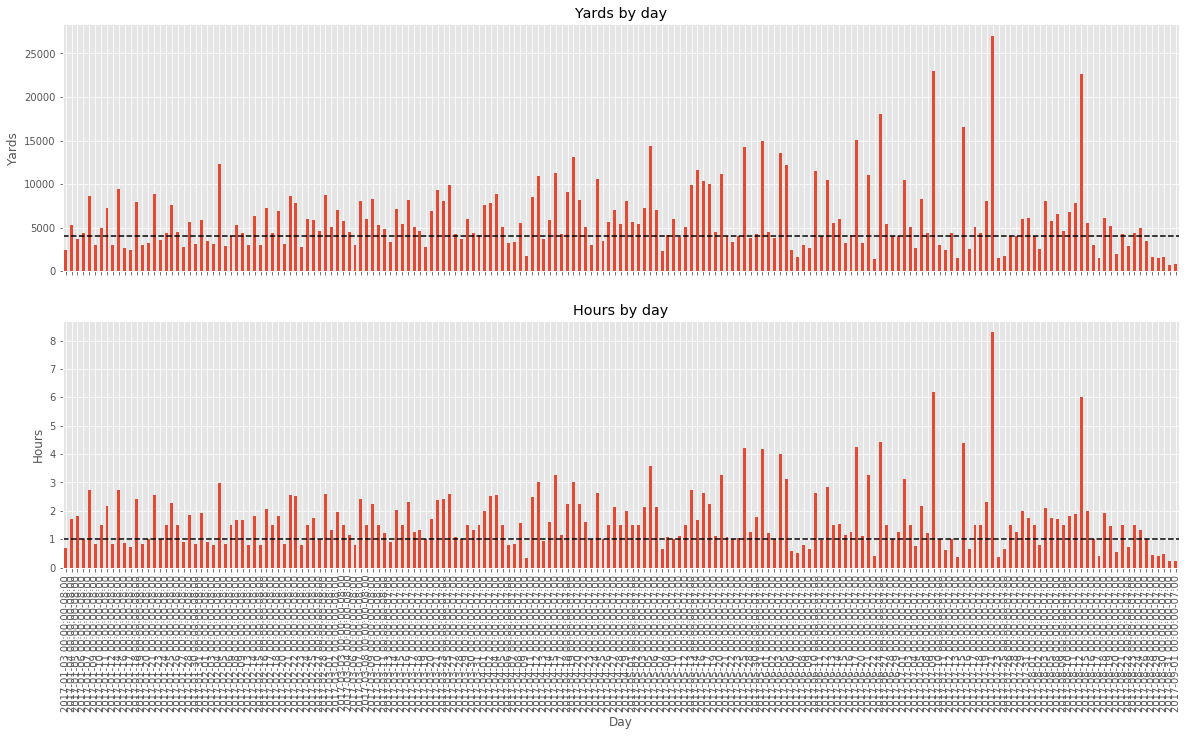

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by day')
axes[1].set_title('Hours by day')


my_swims.groupby(my_swims.index.normalize()).distance.sum().plot(kind='bar', ax=axes[0], sharex=True)
axes[0].axhline(4000, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
#axes[0].step([-1, max(np.where(my_swims.index.normalize().unique().month <= 1)[0])-0.5, 100.5], [0, 3000 / m_to_yd, 4000 / m_to_yd], color='k', linestyle='--')



my_swims.groupby(my_swims.index.normalize()).elapsed_time.sum().apply(lambda x: x / 3600).plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Day')
axes[1].axhline(1, color='k', linestyle='--')
#axes[1].step([-1, max(np.where(my_swims.index.normalize().unique().month <= 1)[0])-0.5, 100.5], [0, 1, 2], color='k', linestyle='--')


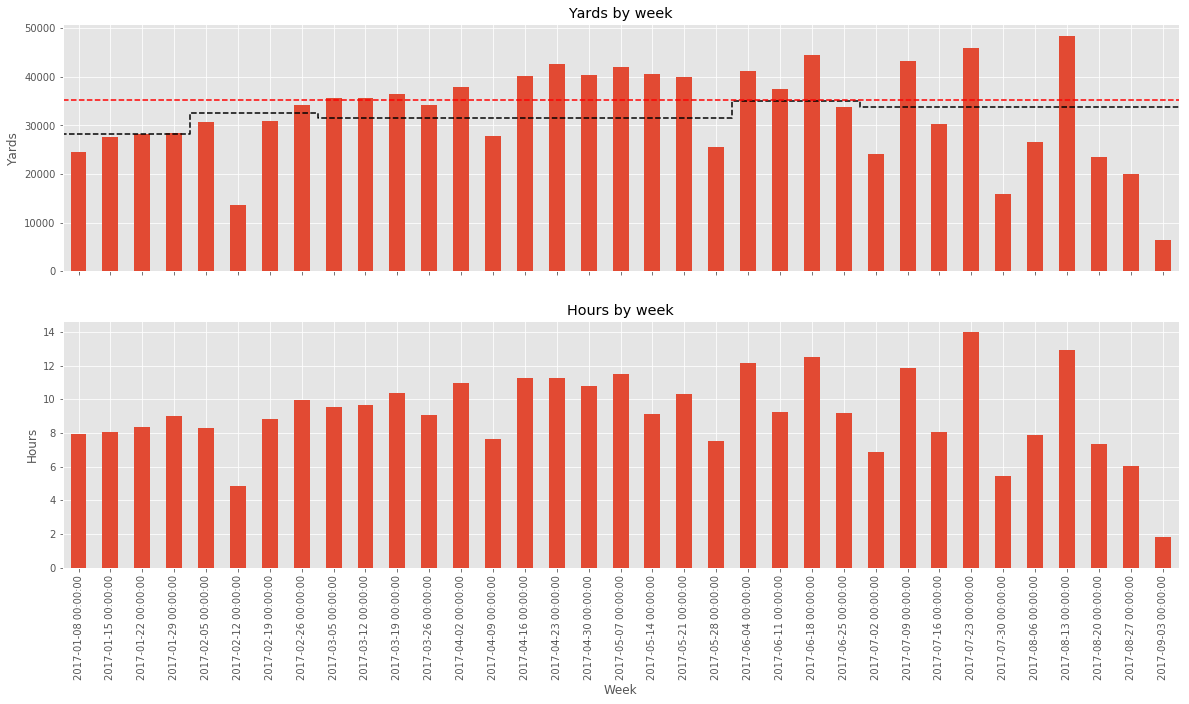

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by week')
axes[1].set_title('Hours by week')


my_swims.groupby(my_swims.ds_week_ending).distance.sum().plot(kind='bar', ax=axes[0], sharex=True)
#axes[0].axhline(28000 / m_to_yd, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
axes[0].step([-1, 3.5, 7.5, 12.5, 16.5, 20.5, 24.5, 28.5, 36.5], 
             [0, 28225, 32500, 31615, 31615, 31615, 35000, 33870, 33870], color='k', linestyle='--')
axes[0].axhline(catalina_yd, color='r', linestyle='--')


my_swims.groupby(my_swims.ds_week_ending).elapsed_time.sum().apply(lambda x: x / 3600).plot(kind='bar', ax=axes[1])
#axes[1].axhline(7.6, color='k', linestyle='--')
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Week')


#### Indoor/Outdoor

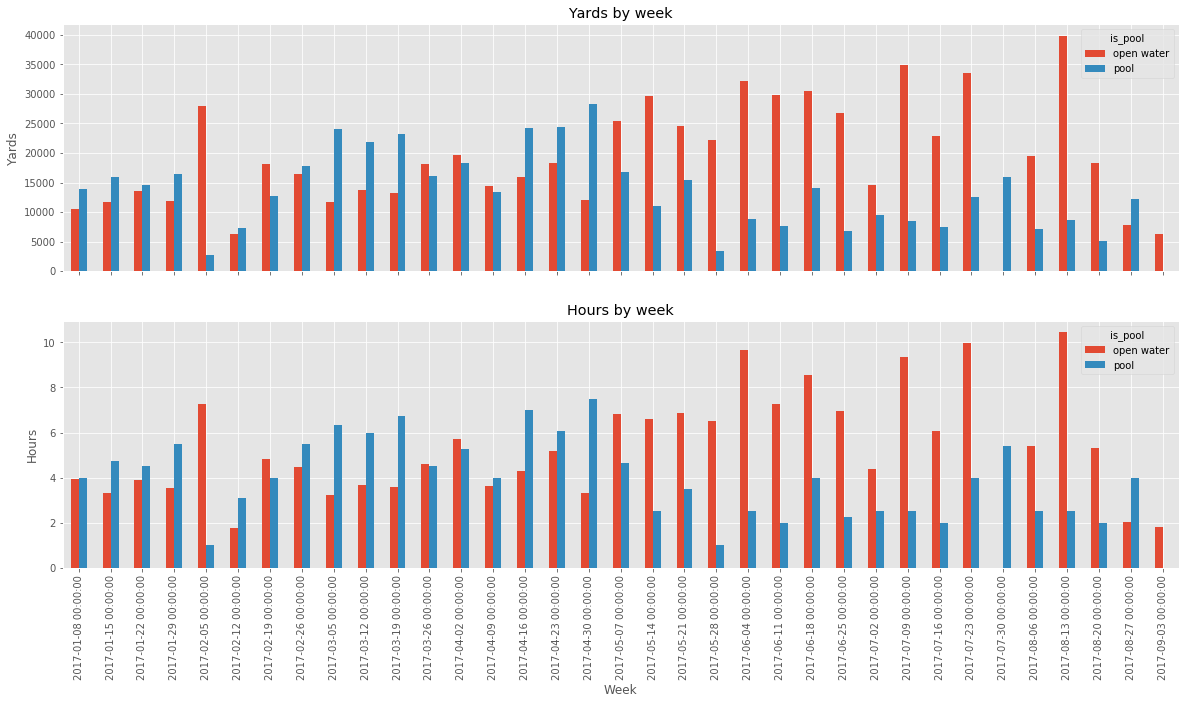

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by week')
axes[1].set_title('Hours by week')

my_swims.groupby(['ds_week_ending', 'is_pool'])['distance'].sum().unstack().plot(kind='bar', ax=axes[0], sharex=True)
#axes[0].axhline(28000 / m_to_yd, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
#axes[0].step([-1, 3.5, 7.5], [0, 28000 / m_to_yd, 32000 / m_to_yd], color='k', linestyle='--')
#axes[0].axhline(catalina_yd, color='r', linestyle='--')

my_swims.groupby(['ds_week_ending', 'is_pool'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack().plot(kind='bar', ax=axes[1])
#axes[1].axhline(7.6, color='k', linestyle='--')
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Week')


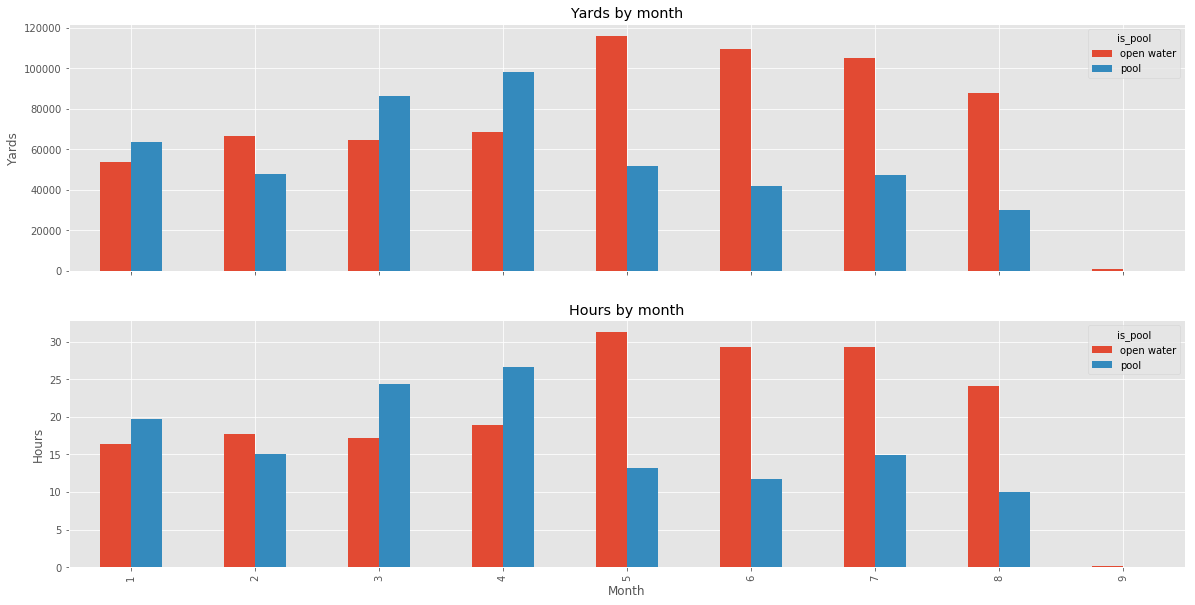

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1)
axes[0].set_title('Yards by month')
axes[1].set_title('Hours by month')


my_swims.groupby(['month', 'is_pool'])['distance'].sum().unstack().plot(kind='bar', ax=axes[0], sharex=True)
#axes[0].axhline(28000 / m_to_yd, color='k', linestyle='--')
axes[0].set_ylabel('Yards')
#axes[0].step([-1, 3.5, 7.5], [0, 28000 / m_to_yd, 32000 / m_to_yd], color='k', linestyle='--')
#axes[0].axhline(catalina_yd, color='r', linestyle='--')

my_swims.groupby(['month', 'is_pool'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack().plot(kind='bar', ax=axes[1])
#axes[1].axhline(7.6, color='k', linestyle='--')
axes[1].set_ylabel('Hours')
axes[1].set_xlabel('Month')


## The Crossing

![alt text](../images/crossing_gps.png)

![alt text](../images/speed.png)

![alt text](../images/water_temp.png)

![alt text](../images/wind_speed.png)

## Learnings

### FAQ

* has he been training for it?
* isn't he afraid of sharks?
* At once?!
* oh! a boat follows you?
* can you get on the boat?
* with a wetsuit right?

## Appendix: The Full Training 

In [10]:
from IPython.display import HTML
HTML(my_swims[['ds_week_ending', 'name', 'distance', 'hours', 'is_pool'
       ]].sort_index(axis=0, ascending=True, inplace=False).to_html())